### Which machine learning models are sensitive to outlers..?

* Naive Bayes Classifier --> Not sensitive to outliers

* Support Vector Machines (SVM) --> Not sensitive

* Linear Regression --> Sensitive

* Logistic Regression --> Sensitive 

* Decision Trees Classifier & Regressor --> Not sensitive

* Ensemble Techniques (RandomForest, XgBoost, GBDT)--> Not sensitive

* KNN Classifier & Regressor --> Not Sensitive

* Clustering Algorithms (K-means, Heirarchical, DBSCAN) --> Sensitive

* Principal Component Analysis (PCA) --> Sensitive

* Latent Dirichlet Allocation (LDA) --> Sensitive

* Neural Networks (ANN) --> Sensitive 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

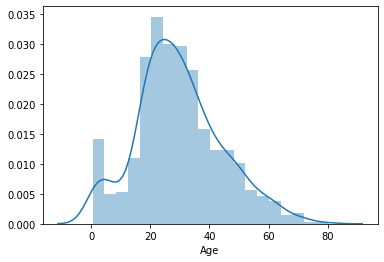

In [4]:
import seaborn as sb
sb.distplot(df['Age'].dropna())

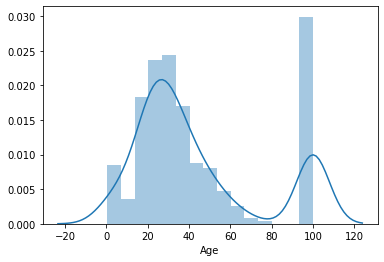

In [5]:
sb.distplot(df['Age'].fillna(100))

### This is Gaussian or Normal Distributed

Text(0, 0.5, 'No. of passengers')

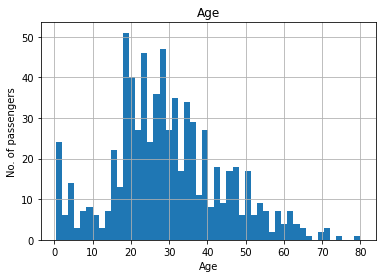

In [6]:
fig = df.Age.hist(bins = 50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No. of passengers')

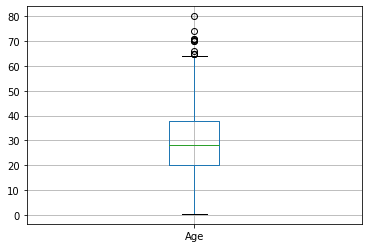

In [7]:
df.boxplot(column='Age')

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## If the features are normally distributed

Assuming 'Age' follows a Gaussian distribution, we will calculate the boundaries which differentiates the outliers

In [10]:
upper_bound = df['Age'].mean() + 3 * df['Age'].std()
lower_bound = df['Age'].mean() - 3 * df['Age'].std()

In [13]:
lower_bound, upper_bound, df['Age'].mean()

(-13.880374349943303, 73.27860964406094, 29.69911764705882)

#### What this means is that after 3 standard deviation, everything is an outlier.

Computing the Inter-quantile range to calculate the boundaries

In [15]:
iqr = df.Age.quantile(0.75) - df.Age.quantile(0.25)
print(iqr)

17.875


In [19]:
lower_bridge = df.Age.quantile(0.25) - (iqr * 1.5)
lower_bridge

-6.6875

In [20]:
upper_bridge = df.Age.quantile(0.75) + (iqr * 1.5)
upper_bridge

64.8125

In [23]:
# Extreme outliers
lower_bridge = df.Age.quantile(0.25) - (iqr * 3.0)
upper_bridge = df.Age.quantile(0.75) + (iqr * 3.0)

In [24]:
lower_bridge, upper_bridge

(-33.5, 91.625)

## If features are skewed

Text(0, 0.5, 'No. of passengers')

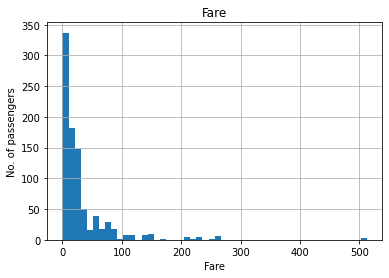

In [25]:
fig = df.Fare.hist(bins = 50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of passengers')

So, this isn't normally distributed. It is left skewed.

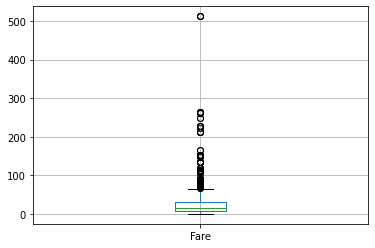

In [26]:
df.boxplot("Fare")

In [27]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
iqr = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
iqr

23.0896

In [29]:
lower_bridge = df.Fare.quantile(0.25) - (iqr * 1.5)
upper_bridge = df.Fare.quantile(0.75) + (iqr * 1.5)

lower_bridge, upper_bridge

(-26.724, 65.6344)

In [30]:
# Extreme outliers
lower_bridge = df.Fare.quantile(0.25) - (iqr * 3.0)
upper_bridge = df.Fare.quantile(0.75) + (iqr * 3.0)

In [31]:
lower_bridge, upper_bridge

(-61.358399999999996, 100.2688)

#### So basically, we have to consider these extreme outliers whenever we find out that the data is skewed. Whereas, if the data is normally distributed, we will consider the '1.5' value. 

## Now, let's build a model

In [32]:
data = df.copy()

In [34]:
data.loc[data['Age'] > 73, 'Age']=73.0 

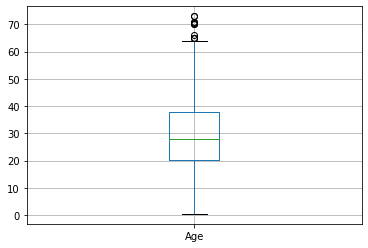

In [35]:
data.boxplot('Age')

In [36]:
data.loc[data['Fare'] > 100, 'Fare']=100

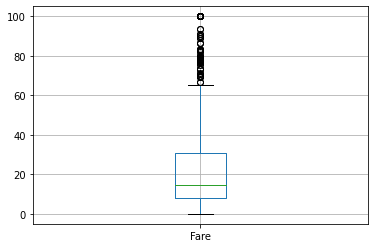

In [37]:
data.boxplot('Fare')

In [41]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


Text(0, 0.5, 'No. of passengers')

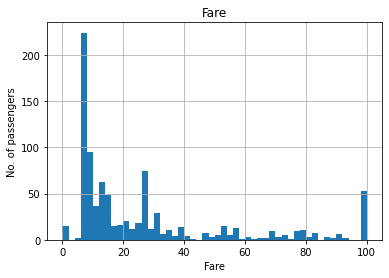

In [39]:
fig = data.Fare.hist(bins = 50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No. of passengers')

Text(0, 0.5, 'No. of passengers')

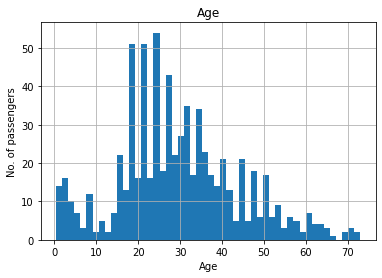

In [42]:
fig = data.Age.hist(bins = 50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No. of passengers')

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size = 0.3, random_state = 1)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train,y_train)

lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [47]:
lr.predict_proba(X_test)[:20]

array([[0.67882339, 0.32117661],
       [0.71325879, 0.28674121],
       [0.72190822, 0.27809178],
       [0.71194527, 0.28805473],
       [0.61544392, 0.38455608],
       [0.74086273, 0.25913727],
       [0.66169811, 0.33830189],
       [0.48547717, 0.51452283],
       [0.29410105, 0.70589895],
       [0.67028673, 0.32971327],
       [0.7456711 , 0.2543289 ],
       [0.74676963, 0.25323037],
       [0.52489643, 0.47510357],
       [0.68477878, 0.31522122],
       [0.7140494 , 0.2859506 ],
       [0.64574389, 0.35425611],
       [0.60973477, 0.39026523],
       [0.70085596, 0.29914404],
       [0.75914337, 0.24085663],
       [0.68590806, 0.31409194]])

In [53]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy Score: {}".format(accuracy_score(y_test,lr.predict(X_test))))
print('ROC/AUC Score: {}'.format(roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])))

Accuracy Score: 0.6455223880597015
ROC/AUC Score: 0.6658141517476556


In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)

rf.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1])

In [58]:
print("Accuracy Score: {}".format(accuracy_score(y_test,rf.predict(X_test))))
print('ROC/AUC Score: {}'.format(roc_auc_score(y_test,rf.predict(X_test))))

Accuracy Score: 0.6343283582089553
ROC/AUC Score: 0.6138675760159136
